In [936]:
from z3 import *
import numpy as np
import pandas as pd
import random
from Supplements import *
from ratspn import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [937]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
y = list(data['target'])
X = pd.DataFrame(data['data'])
X = data_processing(X)[0]
data = X.copy()
data['y'] = y
data = data.sample(frac=1)
data.reset_index(inplace=True, drop=True)
X = data.iloc[:, :-1]
y = data.iloc[:, -1].tolist()
X, y

[]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


(           0         1         2         3         4         5         6   \
 0    0.318472  0.303348  0.310552  0.181336  0.420060  0.268757  0.126172   
 1    0.531923  0.304024  0.528713  0.377306  0.561253  0.396049  0.415183   
 2    0.197785  0.395671  0.187686  0.100445  0.443893  0.123919  0.020982   
 3    0.076483  0.300643  0.071177  0.032959  0.494448  0.119901  0.000000   
 4    0.383312  0.542103  0.374611  0.243097  0.449309  0.240200  0.289363   
 ..        ...       ...       ...       ...       ...       ...       ...   
 564  0.246060  0.274941  0.234953  0.130477  0.468268  0.157015  0.058341   
 565  0.370060  0.268854  0.359961  0.225366  0.353525  0.213238  0.095337   
 566  0.218609  0.499831  0.210352  0.116098  0.199603  0.115024  0.046251   
 567  0.300961  0.207981  0.295073  0.159703  0.498059  0.411386  0.273899   
 568  0.624686  0.332432  0.622003  0.469353  0.547711  0.397276  0.499766   
 
            7         8         9   ...        20        21   

In [ ]:
# X_with_intercept = X.copy()
# X_with_intercept.loc[:, 4] = [1]*X.shape[0]
# X_with_intercept = X_with_intercept[[4, 0, 1, 2, 3]]
# X_with_intercept.columns = range(X_with_intercept.shape[1])
# X_with_intercept

### tasks:

1. Plot the sumproduct network.
2. Come up with a constraint.
3. Implement a SaDe like procedure for sumproduct networks.

In [938]:
dataset = 'loan_data_set.csv'
data = pd.read_csv(dataset, header=0)

processed_output = data_processing(data)
data = processed_output[0]
X = data.iloc[:, 0:data.shape[1] - 1]
X = X.sample(frac = 1)
X.reset_index(inplace=True, drop=True)
y_original = list(data.iloc[:, -1])
scaled_income = processed_output[1].scale_[0] * (5000 - processed_output[1].data_min_[0])

X, y = data_manipulation(X, y_original)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

X_train

['Gender', 'Dependents', 'Property_Area', 'Self_Employed', 'Loan_Status', 'Education', 'Married']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.057724,0.027278,0.187817,0.324324,1.0,1,1,0,0,0,0,0,0,1
1,0.078541,0.000000,0.162437,0.729730,0.0,1,0,0,0,0,0,0,0,0
2,0.113457,0.000000,0.111675,0.324324,1.0,1,1,0,0,0,0,0,0,1
3,0.054830,0.044567,0.201354,0.729730,1.0,1,1,1,0,0,0,0,0,0
4,0.065145,0.124006,0.436548,0.729730,1.0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0.075448,0.000000,0.201354,0.729730,1.0,1,1,0,0,0,0,0,1,0
317,0.049672,0.000000,0.059222,0.729730,1.0,0,0,0,0,0,0,0,1,0
318,0.031280,0.038479,0.143824,0.729730,1.0,1,0,1,0,0,1,0,1,0
319,0.031515,0.060112,0.191201,0.729730,1.0,1,1,0,0,0,0,0,1,0


In [939]:
class SPNNode:
    def __init__(self, scope=[0, 1, 2]):
        self.scope = scope
        self.children = []
        self.parents = []
        self.id = random.randint(0, 100000000)
        self.value = None

    def add_children(self, node):
        self.children.append(node)
        node.parents.append(self)
    

class SumNode(SPNNode):
    def __init__(self, scope=[0, 1, 2]):
        super().__init__(scope)
        self.weights = []
        
    def add_children(self, node):
        self.children.append(node)
        self.weights.append(Real('w_{}_{}'.format(self.id, len(self.weights))))
        node.parents.append(self)
                            
    def infer(self, x):
        self.value = sum([self.weights[i]*self.children[i].infer(x) for i in range(len(self.children))])
        return sum([self.weights[i]*self.children[i].infer(x) for i in range(len(self.children))])
        
        
class ProductNode(SPNNode):
    def __init__(self, scope=[0, 1, 2]):
        super().__init__(scope)
    
    def infer(self, x):
        self.value = math.prod([self.children[i].infer(x) for i in range(len(self.children))])
        return math.prod([self.children[i].infer(x) for i in range(len(self.children))])
    
    
class LeafNode(SPNNode):
    def __init__(self, scope=[0, 1, 2]):
        super().__init__(scope)
    
    def infer(self, x):
        self.value = x[self.scope[0]]
        return x[self.scope[0]]
    

In [940]:
def make_spn(rg, X, c=2, s=2):
    region_spns = {}
    for region in rg._regions:
        if len(region) > 1:
            region_spns[region] = SumNode(scope=region)
        else:
            region_spns[region] = LeafNode(scope=region)
    
    for region in rg._child_partitions:
        partitions = rg._child_partitions[region]
        for p in partitions:
            nodes_p0 = region_spns[p[0]]
            nodes_p1 = region_spns[p[1]]
            region_spns[p] = ProductNode(scope=p)
            region_spns[p].add_children(nodes_p0)
            region_spns[p].add_children(nodes_p1)
            region_spns[tuple(sorted(tuple(set(nodes_p0.scope).union(set(nodes_p1.scope)))))].add_children(region_spns[p])
    
    return region_spns[tuple(range(X.shape[1]))], region_spns # only returning the root node
    

In [941]:
class SPNClassifier:
    def __init__(self, spn=None, timeout=60000):
        self.spn = spn
        self.spn_learned = None
        self.solver = Optimize()   
        set_option('verbose', 10)
        self.solver.set('timeout', timeout)
        self.metadata = {}
    
    def add_decision_constraint(self, x, y):
        if y == 1:
            self.solver.add_soft(self.spn.infer(x) >= 0.0005)
        else:
            self.solver.add_soft(self.spn.infer(x) < 0.0002)
    
    def add_weight_constraints(self, spn=None, weight_limit=100):
        if type(spn) == ProductNode:
            for i in range(len(spn.children)):
                self.add_weight_constraints(spn.children[i], weight_limit=weight_limit)
        elif type(spn) == SumNode:
            self.solver.add(Sum([w for w in spn.weights]) == 1)
            for j in range(len(spn.children)):
                self.solver.add(And(spn.weights[j] >= 0, spn.weights[j] <= weight_limit))
                self.add_weight_constraints(spn.children[j], weight_limit=weight_limit)
                    
    def fit(self, X, y, weight_limit=1):
        if self.spn is None:
            rg = RegionGraph(range(X.shape[1]))
            for k in range(3):
                rg.random_split(2, 4) # first: number of partitions (2); second: depth
            self.metadata['region graph'] = rg
            self.spn, self.metadata['region nodes'] = make_spn(rg, X)

        self.add_weight_constraints(spn=self.spn, weight_limit=weight_limit)
        
        for i in range(X.shape[0]):
            self.add_decision_constraint(X.iloc[i].tolist(), y[i])
        
        output = self.solver.check()
        print(output)
        
        if output == sat:
            self.spn_learned = copy.deepcopy(self.spn)
            self.update_spn(self.spn_learned)
            
    def update_spn(self, spn):
        if type(spn) == ProductNode:
            for i in range(len(spn.children)):
                self.update_spn(spn.children[i])
        elif type(spn) == SumNode:
            for j in range(len(spn.children)):
                if type(spn.weights[j]) == z3.z3.ArithRef:
                    spn.weights[j] = self.solver.model()[spn.weights[j]].numerator_as_long()/self.solver.model()[spn.weights[j]].denominator_as_long()
                self.update_spn(spn.children[j])

                    

In [210]:
clf = SPNClassifier(timeout=300000)
print(y[:10])
clf.fit(X.iloc[:400, :3], y[:])

[0, 1, 1, 1, 1, 1, 0, 1, 0, 1]
sat


In [211]:
def get_weights(spn):
    if type(spn) == SumNode:
        for i in range(len(spn.weights)):
            print(spn.weights[i])
            get_weights(spn.children[i])
    elif type(spn) == ProductNode:
        for i in range(len(spn.children)):
            get_weights(spn.children[i])    

get_weights(clf.spn_learned)

1.0
1.0
0.0
1.0


In [213]:
from sklearn.metrics import accuracy_score

def predict(clf, X):
    y = []
    for i in range(X.shape[0]):
        pred = clf.spn_learned.infer(X.iloc[i].tolist())
        print(pred)
        if pred >= 0.0002:
            y.append(1)
        else:
            y.append(0)
    return y

y_pred = predict(clf, X.iloc[:400, :43])
y_pred[:3], y[:3], accuracy_score(y[:400], y_pred)

0.0
0.0006862111535193078
0.0
0.000750555076059146
0.00026707834021714327
0.00036221752540161085
0.0
0.0
0.0005662431951258543
0.0
0.0004757146757904004
0.0
0.00017604094333930584
0.0
0.0002605962860026497
0.0001760321655683164
0.0
0.00019746172778809754
0.0
0.0
0.0
0.0
0.00032619683255501354
0.0
0.00046014832565283685
0.0
0.0014126182636767968
0.000572886864358479
0.016278769931499522
0.0002207908461612956
0.0
0.0
0.0
0.0006492328758721134
0.00023416367882949908
0.0
0.0007313353102639423
0.0002515150535167071
8.493739774336516e-05
0.0006124317370081332
0.0
0.0
0.0
0.0
0.0023723227982447677
0.00030685397633452126
0.0002804772445722492
0.0
0.0008031535518073966
0.0
0.0
0.0017662542710375258
0.0
0.0
0.0
0.0
0.0
0.0015687304481890943
0.0
0.0
0.005185723962319253
0.0
0.0003017668028291518
0.0001685798998484095
0.0
0.0004987996098353408
0.0002648070431120181
0.0
0.0007494415349091597
0.0001696811996199134
0.0
0.0
9.81609476916169e-05
0.0005786678132887319
0.0
0.00025311420109623323
0.000275

([0, 1, 0], [0, 1, 1], 0.5175)

In [170]:
X.iloc[1, :4].tolist(), clf.spn_learned.infer(X.iloc[1, :4])

([0.07709338280766852,
  0.029553447409640336,
  0.3011844331641286,
  0.7297297297297298],
 0.0005007486795951706)

In [186]:
clf_logistic = LogisticRegression(fit_intercept=True)
clf_logistic.fit(X.iloc[:100, :5], y[:100])
clf_logistic.score(X.iloc[:100, :5], y[:100])

0.73

In [944]:
import pydot


def print_tree(spn, g=None, path=None):
            
    if g is None:
        graph = pydot.Dot('my_graph', graph_type='digraph', bgcolor='white')
    else:
        graph = g
    
    if type(spn) == SumNode:
        graph.add_node(pydot.Node('{}'.format(spn.id), label='+ \n {}'.format(spn.scope),
                           shape='circle'))    
    elif type(spn) == ProductNode:
        graph.add_node(pydot.Node('{}'.format(spn.id), label='X \n {}'.format(spn.scope),
                                   shape='circle'))
    elif type(spn) == LeafNode: 
        graph.add_node(pydot.Node('{}'.format(spn.id), label='{}'.format(spn.scope),
                                   shape='rectangle'))
            
    for p in spn.parents:
        if type(p) is SumNode:
            index_spn = p.children.index(spn)
            graph.add_edge(pydot.Edge('{}'.format(p.id), '{}'.format(spn.id), color='red', label=p.weights[index_spn]))
        else:
            graph.add_edge(pydot.Edge('{}'.format(p.id), '{}'.format(spn.id), color='red'))
    
    for child in spn.children:
        if g is not None:
            if str(child.id) not in [n.get_name() for n in g.get_nodes()]:
                print_tree(child, g=graph, path=path) 
        else:
            print_tree(child, g=graph, path=path)
            
    graph.write_png('{}.png'.format(path))
    

In [146]:
plot_path = "tmp"

In [208]:
print_tree(clf.spn, g=None, path=plot_path)

In [133]:
spn = copy.deepcopy(clf.spn)

In [136]:
spn.infer([1,2,3,4,2])

0 +
w_50526347_0*
1*
(0 +
 w_48836028_0*1*(0 + w_41241425_0*8) +
 w_48836028_1*1*(0 + w_12249068_0*2)*4)*
(0 + w_474606_0*6) +
w_50526347_1*
1*
(0 + w_89335518_0*1*(0 + w_56575680_0*2)*3)*
(0 + w_41241425_0*8)

In [137]:
spn.value

0 +
w_50526347_0*
1*
(0 +
 w_48836028_0*1*(0 + w_41241425_0*8) +
 w_48836028_1*1*(0 + w_12249068_0*2)*4)*
(0 + w_474606_0*6) +
w_50526347_1*
1*
(0 + w_89335518_0*1*(0 + w_56575680_0*2)*3)*
(0 + w_41241425_0*8)

In [39]:
clf.metadata['region graph'].make_layers()

[[(0,), (1,), (2,), (3,), (4,)],
 [((3,), (4,)), ((0,), (1,)), ((1,), (2,)), ((0,), (4,))],
 [(0, 1), (0, 4), (1, 2), (3, 4)],
 [((0,), (3, 4)), ((0, 4), (3,)), ((0, 1), (2,))],
 [(0, 1, 2), (0, 3, 4)],
 [((0, 1, 2), (3, 4)), ((0, 3, 4), (1, 2))],
 [(0, 1, 2, 3, 4)]]

In [33]:
c = clf.spn.children[1]
clf.spn.children.index(c)

1

In [942]:
def make_spn(rg, X, c=2, s=2, i=1):
    region_spns = {}
    for region in rg._regions:
        if len(region) == X.shape[1]:
            region_spns[region] = [SumNode(scope=region) for j in range(c)]
        elif len(region) > 1:
            region_spns[region] = [SumNode(scope=region) for j in range(s)]
        else:
            region_spns[region] = [LeafNode(scope=region) for j in range(i)]
    
    print(region_spns)
    for region in rg._child_partitions:
        partitions = rg._child_partitions[region]
        for p in partitions:
            print(p)
            all_nodes_p = []
            nodes_p0 = region_spns[p[0]]
            nodes_p1 = region_spns[p[1]]
            for n1 in nodes_p0:
                for n2 in nodes_p1:
                    all_nodes_p.append(ProductNode(scope=p))
                    all_nodes_p[-1].add_children(n1)
                    all_nodes_p[-1].add_children(n2)
                    for n in region_spns[tuple(sorted(tuple(set(n1.scope).union(set(n2.scope)))))]:
                        n.add_children(all_nodes_p[-1])
            region_spns[p] = all_nodes_p
    
    return region_spns[tuple(range(X.shape[1]))], region_spns # only returning the root node

In [359]:
rg = RegionGraph(range(X.iloc[:, :].shape[1]))
for k in range(3):
    rg.random_split(2, 4) # first: number of partitions (2); second: depth
rg.make_layers() 

[[(0,),
  (1,),
  (2,),
  (3,),
  (4,),
  (5,),
  (6,),
  (7,),
  (8,),
  (9,),
  (10,),
  (11,),
  (12,),
  (13,)],
 [((1,), (7,)),
  ((1,), (13,)),
  ((11,), (12,)),
  ((1,), (8,)),
  ((5,), (7,)),
  ((0,), (12,)),
  ((0,), (7,)),
  ((2,), (5,)),
  ((3,), (10,)),
  ((0,), (13,)),
  ((4,), (9,)),
  ((8,), (11,)),
  ((2,), (6,)),
  ((2,), (8,)),
  ((3,), (13,)),
  ((9,), (11,))],
 [(0, 7),
  (0, 12),
  (0, 13),
  (1, 7),
  (1, 8),
  (1, 13),
  (2, 5),
  (2, 6),
  (2, 8),
  (3, 10),
  (3, 13),
  (4, 9),
  (5, 7),
  (8, 11),
  (9, 11),
  (11, 12)],
 [((0, 7), (6,)),
  ((0, 13), (6,)),
  ((1, 8), (5, 7)),
  ((1, 7), (4, 9)),
  ((0, 12), (10,)),
  ((3, 10), (8, 11)),
  ((5,), (11, 12)),
  ((2, 5), (12,)),
  ((1, 13), (4, 9)),
  ((2, 6), (4,)),
  ((2, 8), (3, 10)),
  ((3, 13), (9, 11))],
 [(0, 6, 7),
  (0, 6, 13),
  (0, 10, 12),
  (1, 4, 7, 9),
  (1, 4, 9, 13),
  (1, 5, 7, 8),
  (2, 3, 8, 10),
  (2, 4, 6),
  (2, 5, 12),
  (3, 8, 10, 11),
  (3, 9, 11, 13),
  (5, 11, 12)],
 [((0, 6, 7), (3, 8

In [356]:
rg = make_spn(rg, X.iloc[:, :])

{(0, 10, 11, 13): [<__main__.SumNode object at 0x7feb50d1b6d0>, <__main__.SumNode object at 0x7feb50d1b0a0>], (3, 8, 10, 11): [<__main__.SumNode object at 0x7feb50d1b4f0>, <__main__.SumNode object at 0x7feb50d1bb80>], (1, 2, 4, 5, 7, 9, 10): [<__main__.SumNode object at 0x7feb50d1bc70>, <__main__.SumNode object at 0x7feb50d1bca0>], (5, 6, 8): [<__main__.SumNode object at 0x7feb50d1b5e0>, <__main__.SumNode object at 0x7feb50d1b040>], (2, 3, 5, 6, 8, 9, 12): [<__main__.SumNode object at 0x7feb50d1b340>, <__main__.SumNode object at 0x7feb50d1b3d0>], (0, 8, 11, 12): [<__main__.SumNode object at 0x7feb50d1b220>, <__main__.SumNode object at 0x7feb50d1b970>], (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13): [<__main__.SumNode object at 0x7feb50d1ba00>, <__main__.SumNode object at 0x7feb50d1b8b0>], (2, 4, 5): [<__main__.SumNode object at 0x7feb50d1b940>, <__main__.SumNode object at 0x7feb50d39280>], (3, 6, 13): [<__main__.SumNode object at 0x7feb50d1b730>, <__main__.SumNode object at 0x7feb50d3

In [546]:
from scipy.stats import norm

def gaussian(x, mean=0, alpha=1):
    return norm.pdf(x, loc=mean, scale=alpha)

In [943]:
class SPNClassifier:
    def __init__(self, spn=None, timeout=60000):
        self.spn = spn
        self.spn_learned = None
        self.solver = Optimize()   
        set_option('verbose', 10)
#         self.solver.set(unsat_core=True)
        self.solver.set('timeout', timeout)
        self.metadata = {}
        self.T = None
        self.H = []
        self.S = []
        
    def add_decision_constraint(self, X, y, i, mean, std):
        x = X.iloc[i].tolist()
        x_prob = gaussian(x, mean, std)
        
        if y[i] == 1:
            self.solver.add_soft(self.spn[0].infer(x_prob) < self.spn[1].infer(x_prob))
        else:
            self.solver.add_soft(self.spn[0].infer(x_prob) > self.spn[1].infer(x_prob))
            
    def add_weight_constraints(self, spn=None, weight_limit=100):
        if type(spn) == ProductNode:
            for i in range(len(spn.children)):
                self.add_weight_constraints(spn.children[i], weight_limit=weight_limit)
        elif type(spn) == SumNode:
            self.H.append(Sum([w for w in spn.weights]) == 1)
            for j in range(len(spn.children)):
                self.H.append(And(spn.weights[j] >= 0, spn.weights[j] <= weight_limit))
                self.add_weight_constraints(spn.children[j], weight_limit=weight_limit)
                    
    def fit(self, X, y, weight_limit=1, X_mean=None, X_std=None):
        self.T = [Bool('t_{}'.format(i)) for i in range(X.shape[0])]
        if self.spn is None:
            rg = RegionGraph(range(X.shape[1]))
            for k in range(3):
                rg.random_split(2, 4) # first: number of partitions (2); second: depth
            self.metadata['region graph'] = rg
            self.spn, self.metadata['region nodes'] = make_spn(rg, X, c=2, s=2)
         
            
        for s in self.spn:
            self.add_weight_constraints(spn=s, weight_limit=weight_limit)
        print('weight constraints added')

        for i in range(X.shape[0]):
            self.add_decision_constraint(X, y, i, X_mean, X_std)
        print("decision constraints added")
        
#         for i in range(len(clf.spn)):
#             print_tree(clf.spn[i], g=None, path='tmp{}'.format(i+1))
        
        output = self.solver.check(self.H)
        print(output)
        
        if output == sat:
            self.spn_learned = copy.deepcopy(self.spn)
            self.update_spn(self.spn_learned[0])
            self.update_spn(self.spn_learned[1])
            
    def update_spn(self, spn):
        if type(spn) == ProductNode:
            for i in range(len(spn.children)):
                self.update_spn(spn.children[i])
        elif type(spn) == SumNode:
            for j in range(len(spn.children)):
                if type(spn.weights[j]) == z3.z3.ArithRef:
                    spn.weights[j] = self.solver.model()[spn.weights[j]].numerator_as_long()/self.solver.model()[spn.weights[j]].denominator_as_long()
                self.update_spn(spn.children[j])

                    

In [ ]:
X_mean = X.mean().tolist()
X_std = X.std().tolist()
clf = SPNClassifier(timeout=300000)
clf.fit(X.iloc[:5, :5], y[:], X_mean=X_mean[:5], X_std=X_std[:5]), y[:6]

{(0, 1): [<__main__.SumNode object at 0x7feb41bf1880>, <__main__.SumNode object at 0x7feb41bf1490>], (1, 2): [<__main__.SumNode object at 0x7feb41bf1580>, <__main__.SumNode object at 0x7feb41bf1730>], (2,): [<__main__.LeafNode object at 0x7feb41bf1520>], (3, 4): [<__main__.SumNode object at 0x7feb41bf1760>, <__main__.SumNode object at 0x7feb41bf17c0>], (0, 4): [<__main__.SumNode object at 0x7feb41bf1460>, <__main__.SumNode object at 0x7feb41bf1a00>], (0, 1, 2): [<__main__.SumNode object at 0x7feb41bf1940>, <__main__.SumNode object at 0x7feb41bf1a60>], (0, 3, 4): [<__main__.SumNode object at 0x7feb41bf19d0>, <__main__.SumNode object at 0x7feb41bf1a90>], (4,): [<__main__.LeafNode object at 0x7feb41bf1ac0>], (1,): [<__main__.LeafNode object at 0x7feb41bf1b20>], (0,): [<__main__.LeafNode object at 0x7feb41bf1b80>], (0, 1, 2, 3, 4): [<__main__.SumNode object at 0x7feb41bf1be0>, <__main__.SumNode object at 0x7feb41bf1c70>], (3,): [<__main__.LeafNode object at 0x7feb41bf1c40>]}
((0, 3, 4), (1

In [951]:
clf.spn_learned[1].weights

[0.75, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0]

In [953]:
for i in range(10):
    print(y[i], clf.spn_learned[0].infer(X.iloc[i, :4].tolist()), clf.spn_learned[1].infer(X.iloc[i, :4].tolist()))

0 0.0 0.0
1 0.00010902193768682288 0.00010902193768682288
1 0.00010442625016829384 0.00010442625016829383
1 0.00034221257757383256 0.0003422125775738325
1 0.0 0.0
1 0.0 0.0
0 0.0 0.0
1 0.0 0.0
0 0.0002554248789003502 0.0002554248789003502
1 0.0 0.0


In [690]:
clf.spn_learned[1].weights

TypeError: 'NoneType' object is not subscriptable

In [367]:
start = time.time()
for i in range(100):
    print(i)
    clf.spn[0].infer(X.iloc[i, :].tolist())
print(time.time - start)

0
1
2


Exception ignored in: <function AstRef.__del__ at 0x7feb6401dca0>
Traceback (most recent call last):
  File "/Users/kshitijgoyal/opt/anaconda3/envs/LearningWithConstraints_IJCAI/lib/python3.8/site-packages/z3/z3.py", line 314, in __del__
    Z3_dec_ref(self.ctx.ref(), self.as_ast())
KeyboardInterrupt: 


KeyboardInterrupt: 

In [773]:
s = Solver()
w1 = Real('w1')
w2 = Real('w2')
w3 = Real('w3')
w4 = Real('w4')
s.add(Sum(w1+w3) == 1)
# s.add(8*w3*w1[0] + 8*w4*w1[1] > 8*w3*w2[0] + 8*w4*w2[1])
s.add(w2 == 1)
s.add(w4 == 1)
s.add(6*w1 + 6*w3 < 0.0005)
s.check()


unsat

In [818]:
train_data = np.c_[np.r_[np.random.normal(5, 1, (500, 2)), np.random.normal(10, 1, (500, 2))],
                   np.r_[np.zeros((500, 1)), np.ones((500, 1))]]
train_data

array([[ 4.55401408,  4.64180529,  0.        ],
       [ 4.55697217,  4.70411169,  0.        ],
       [ 3.95424861,  4.68409338,  0.        ],
       ...,
       [ 8.94621579, 11.61643669,  1.        ],
       [11.98774554,  9.8420069 ,  1.        ],
       [ 9.27058137, 10.52805171,  1.        ]])

30

In [842]:
from spn.structure.Base import Context
from spn.structure.leaves.parametric.Parametric import Categorical, Gaussian
from spn.algorithms.LearningWrappers import learn_parametric

ds_context = Context(parametric_types=[Gaussian]*len(np.array(X.iloc[:, :3])[0])).add_domains(np.array(X.iloc[:, :3]))

spn = learn_parametric(np.array(X.iloc[:, :3]), ds_context, min_instances_slice=20)

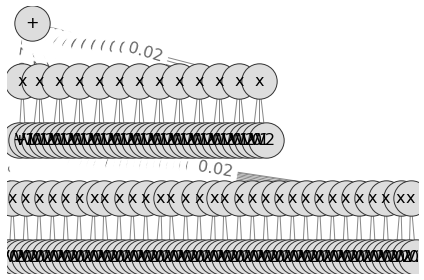

In [843]:
from spn.io.Graphics import plot_spn
plot_spn(spn)